In [1]:
import numpy as np
from datetime import date
from matplotlib import pyplot as plt, colors
from mpl_toolkits.mplot3d import Axes3D
import seaborn

In [2]:
# %matplotlib qt
%matplotlib inline
seaborn.set(style='whitegrid')

In [3]:
year=2021
month=7
day=21

day_of_year=(date(year,month,day)-date(year,1,1)).days

In [4]:
def hours_light_per_day(n_day,latitude):
    if type(n_day)==np.ndarray and type(latitude)==np.ndarray:
        n_day=n_day.reshape(1,len(n_day)) 
        latitude=latitude.reshape(len(latitude),1)    
    declination=-23.44*np.cos(np.deg2rad((360.0/365.0)*(n_day+10)))
    return 2*24.0/(2*np.pi)*np.arccos(-np.tan(np.deg2rad(latitude))*np.tan(np.deg2rad(declination)))

C:\Users\astoeltz\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arccos
  
C:\Users\astoeltz\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arccos
  


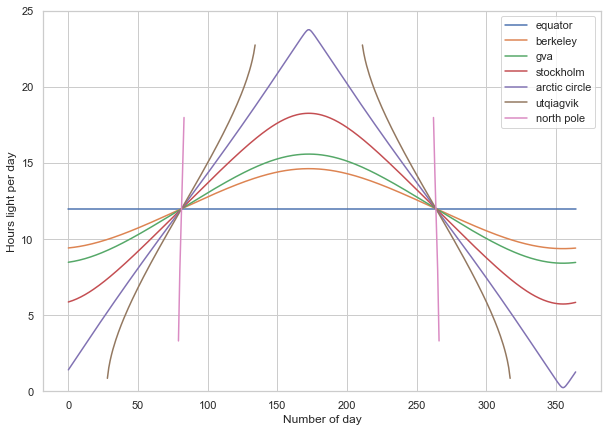

In [5]:
days=np.arange(365)

plt.figure(figsize=(10,7))

plt.plot(days,hours_light_per_day(days,0),label='equator')
plt.plot(days,hours_light_per_day(days,37.871666),label='berkeley')
plt.plot(days,hours_light_per_day(days,46.204391),label='gva')
plt.plot(days,hours_light_per_day(days,59.334591),label='stockholm')
plt.plot(days,hours_light_per_day(days,66.55),label='arctic circle')
plt.plot(days,hours_light_per_day(days,71.290558),label='utqiagvik')
plt.plot(days,hours_light_per_day(days,89),label='north pole')

plt.legend()
plt.ylim(0,25)
plt.xlabel('Number of day')
plt.ylabel('Hours light per day');

C:\Users\astoeltz\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arccos
  
C:\Users\astoeltz\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arccos
  
C:\Users\astoeltz\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arccos
  
C:\Users\astoeltz\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arccos
  


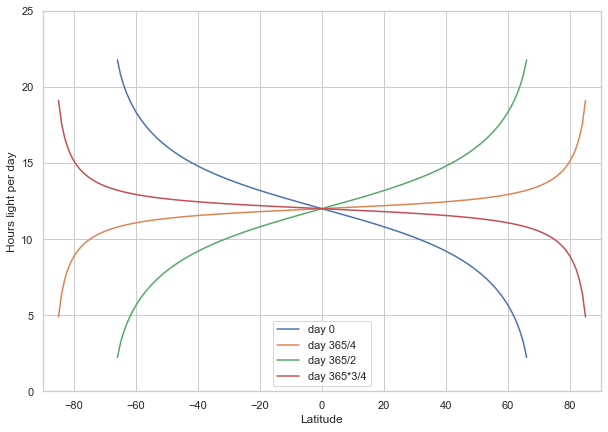

In [6]:
latitudes=np.arange(-90,91)

plt.figure(figsize=(10,7))

plt.plot(latitudes, hours_light_per_day(0,latitudes),label='day 0')
plt.plot(latitudes, hours_light_per_day(365/4,latitudes),label='day 365/4')
plt.plot(latitudes, hours_light_per_day(365/2,latitudes),label='day 365/2')
plt.plot(latitudes, hours_light_per_day(365*3/4,latitudes),label='day 365*3/4')

plt.xlabel('Latitude')
plt.ylim(0,25)
plt.xlim(-90,90)
plt.legend()
plt.ylabel('Hours light per day');

C:\Users\astoeltz\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arccos
  
C:\Users\astoeltz\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  
C:\Users\astoeltz\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


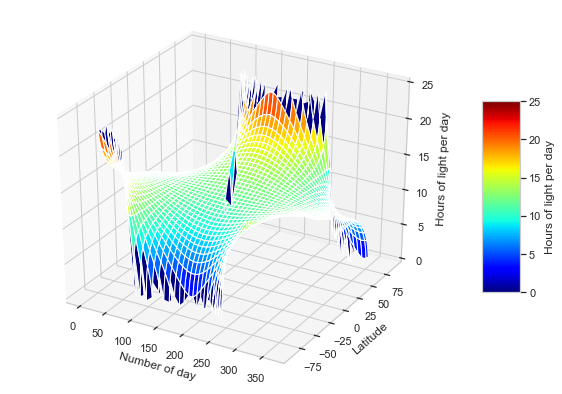

In [7]:
X, Y = np.meshgrid(days, latitudes)
Z= hours_light_per_day(days,latitudes)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
daylight=ax.plot_surface(X, Y, Z,cmap='jet',norm=colors.Normalize(vmin=0, vmax=25))
ax.set_zlim(0,25)
fig.colorbar(daylight, shrink=0.5, aspect=5, label='Hours of light per day')
ax.set_xlabel('Number of day')
ax.set_ylabel('Latitude')
ax.set_zlabel('Hours of light per day');

C:\Users\astoeltz\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arccos
  


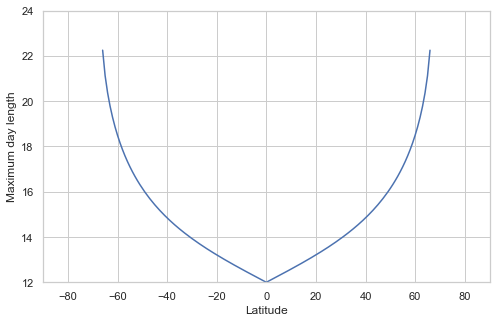

In [8]:
plt.figure(figsize=(8,5))
plt.plot(latitudes, np.amax(hours_light_per_day(days,latitudes),1))
plt.xlabel('Latitude')
plt.ylim(12,24)
plt.xlim(-90,90)
plt.ylabel('Maximum day length');